# AutoFL Sequence Pattern Analysis - 4-grams

Analyze 4-gram subsequences in messages from AutoFL trajectory data (bip_cosmosfl_{1..10}/llama3/).

In [1]:
import json
import os
from collections import Counter
from pathlib import Path
from typing import List, Tuple
import pandas as pd

In [20]:
def extract_function_call_sequence(messages: List[dict]) -> List[str]:
    """
    Extract the sequence of roles from messages.

    Args:
        messages: List of message dictionaries

    Returns:
        List of role strings in order
    """
    sequence = []
    for msg in messages:
        if 'function_call' in msg:
            sequence.append(msg['function_call']['name'])
    return sequence


def get_4grams(sequence: List[str]) -> List[Tuple[str, str, str, str]]:
    """
    Extract all 4-grams from a sequence.

    Args:
        sequence: List of items

    Returns:
        List of 4-gram tuples
    """
    four_grams = []
    for i in range(len(sequence) - 3):
        four_gram = tuple(sequence[i:i+4])
        four_grams.append(four_gram)
    return four_grams


def get_4grams_for_all_executions_in_directory(directory_path: Path) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract 4-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all 4-grams found
    """
    all_4grams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                four_grams = get_4grams(sequence)
                all_4grams.extend(four_grams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_4grams

def get_4grams_for_successful_executions_in_directory(directory_path: Path) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract 4-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all 4-grams found
    """
    all_4grams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            buggy_methods = data["buggy_methods"]
            if isinstance(buggy_methods, str):
                is_found = False
            else:
                is_found = False
                for method, found_result in buggy_methods.items():
                    if found_result["is_found"]:
                        is_found = True
            
            if not is_found:
                continue

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                four_grams = get_4grams(sequence)
                all_4grams.extend(four_grams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_4grams

def get_4grams_for_failing_executions_in_directory(directory_path: Path) -> List[Tuple[str, str, str, str]]:
    """
    Process all JSON files in a directory and extract 4-grams.

    Args:
        directory_path: Path to directory containing JSON files

    Returns:
        List of all 4-grams found
    """
    all_4grams = []


    for json_file in directory_path.glob("*.json"):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            buggy_methods = data["buggy_methods"]
            if isinstance(buggy_methods, str):
                is_found = False
            else:
                is_found = False
                for method, found_result in buggy_methods.items():
                    if found_result["is_found"]:
                        is_found = True
            
            if is_found:
                continue

            if 'messages' in data:
                sequence = extract_function_call_sequence(data['messages'])
                four_grams = get_4grams(sequence)
                all_4grams.extend(four_grams)
        except Exception as e:
            print(f"Error processing {json_file}: {e}")

    return all_4grams

In [21]:
def get_4grams_for_all_executions(benchmark, model):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_4grams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            four_grams = get_4grams_for_all_executions_in_directory(model_path)
            all_4grams.extend(four_grams)
            # print(f"  Found {len(four_grams)} 4-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal 4-grams collected: {len(all_4grams)}")

    return all_4grams

def get_4grams_for_success_executions(benchmark, model):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_4grams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            four_grams = get_4grams_for_successful_executions_in_directory(model_path)
            all_4grams.extend(four_grams)
            # print(f"  Found {len(four_grams)} 4-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal 4-grams collected: {len(all_4grams)}")

    return all_4grams

def get_4grams_for_fail_executions(benchmark, model):
    # Process all directories
    base_path = Path("raw_data/autofl")

    all_4grams = []

    for i in range(1, 11):
        if benchmark == 'bip':
            dir_name = f"bip_cosmosfl_{i}"
        elif benchmark == 'd4j':
            dir_name = f"d4j_autofl_eol_{i}"
            
        model_path = base_path / dir_name / model

        if model_path.exists():
            # print(f"Processing {dir_name}...")
            four_grams = get_4grams_for_failing_executions_in_directory(model_path)
            all_4grams.extend(four_grams)
            # print(f"  Found {len(four_grams)} 4-grams")
        else:
            print(f"Warning: {model_path} does not exist")

    print(f"\nTotal 4-grams collected: {len(all_4grams)}")

    return all_4grams

In [23]:
# Get 4-gram: frequencies for all benchmarks and models

benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_4grams = get_4grams_for_all_executions(bm, model)

        all_counter = Counter(all_4grams)

        results = []
        for four_gram, count in all_counter.most_common():
            results.append({
                '4gram': four_gram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_file = f"./4gram_frequency/all_executions/{bm}_{model}_4gram_frequencies.csv"
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique 4-gram")





Total 4-grams collected: 3477
Saved ./4gram_frequency/all_executions/d4j_llama3_4gram_frequencies.csv with 177 unique 4-gram

Total 4-grams collected: 8399
Saved ./4gram_frequency/all_executions/d4j_llama3.1_4gram_frequencies.csv with 224 unique 4-gram

Total 4-grams collected: 1523
Saved ./4gram_frequency/all_executions/d4j_mistral-nemo_4gram_frequencies.csv with 67 unique 4-gram

Total 4-grams collected: 2082
Saved ./4gram_frequency/all_executions/d4j_qwen2.5-coder_4gram_frequencies.csv with 98 unique 4-gram

Total 4-grams collected: 11179
Saved ./4gram_frequency/all_executions/bip_llama3_4gram_frequencies.csv with 100 unique 4-gram

Total 4-grams collected: 15279
Saved ./4gram_frequency/all_executions/bip_llama3.1_4gram_frequencies.csv with 183 unique 4-gram

Total 4-grams collected: 2017
Saved ./4gram_frequency/all_executions/bip_mistral-nemo_4gram_frequencies.csv with 33 unique 4-gram

Total 4-grams collected: 1831
Saved ./4gram_frequency/all_executions/bip_qwen2.5-coder_4gram_fr

In [24]:
# Get 4-gram: frequencies from successing executions for all benchmarks and models

benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_4grams = get_4grams_for_success_executions(bm, model)

        success_counter = Counter(all_4grams)

        results = []
        for four_gram, count in success_counter.most_common():
            results.append({
                '4gram': four_gram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_file = f"./4gram_frequency/success_executions/{bm}_{model}_4gram_frequencies.csv"
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique 4-gram")





Total 4-grams collected: 950
Saved ./4gram_frequency/success_executions/d4j_llama3_4gram_frequencies.csv with 120 unique 4-gram

Total 4-grams collected: 1663
Saved ./4gram_frequency/success_executions/d4j_llama3.1_4gram_frequencies.csv with 150 unique 4-gram

Total 4-grams collected: 330
Saved ./4gram_frequency/success_executions/d4j_mistral-nemo_4gram_frequencies.csv with 39 unique 4-gram

Total 4-grams collected: 503
Saved ./4gram_frequency/success_executions/d4j_qwen2.5-coder_4gram_frequencies.csv with 64 unique 4-gram

Total 4-grams collected: 1152
Saved ./4gram_frequency/success_executions/bip_llama3_4gram_frequencies.csv with 36 unique 4-gram

Total 4-grams collected: 2662
Saved ./4gram_frequency/success_executions/bip_llama3.1_4gram_frequencies.csv with 117 unique 4-gram

Total 4-grams collected: 441
Saved ./4gram_frequency/success_executions/bip_mistral-nemo_4gram_frequencies.csv with 20 unique 4-gram

Total 4-grams collected: 370
Saved ./4gram_frequency/success_executions/bi

In [25]:
# Get 4-gram: frequencies from failing executions for all benchmarks and models

benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        all_4grams = get_4grams_for_fail_executions(bm, model)

        failing_counter = Counter(all_4grams)

        results = []
        for four_gram, count in failing_counter.most_common():
            results.append({
                '4gram': four_gram,
                'frequency': count
            })
        
        df = pd.DataFrame(results)
        output_file = f"./4gram_frequency/fail_executions/{bm}_{model}_4gram_frequencies.csv"
        df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(df)} unique 4-gram")





Total 4-grams collected: 2527
Saved ./4gram_frequency/fail_executions/d4j_llama3_4gram_frequencies.csv with 168 unique 4-gram

Total 4-grams collected: 6736
Saved ./4gram_frequency/fail_executions/d4j_llama3.1_4gram_frequencies.csv with 221 unique 4-gram

Total 4-grams collected: 1193
Saved ./4gram_frequency/fail_executions/d4j_mistral-nemo_4gram_frequencies.csv with 57 unique 4-gram

Total 4-grams collected: 1579
Saved ./4gram_frequency/fail_executions/d4j_qwen2.5-coder_4gram_frequencies.csv with 92 unique 4-gram

Total 4-grams collected: 10027
Saved ./4gram_frequency/fail_executions/bip_llama3_4gram_frequencies.csv with 99 unique 4-gram

Total 4-grams collected: 12617
Saved ./4gram_frequency/fail_executions/bip_llama3.1_4gram_frequencies.csv with 177 unique 4-gram

Total 4-grams collected: 1576
Saved ./4gram_frequency/fail_executions/bip_mistral-nemo_4gram_frequencies.csv with 33 unique 4-gram

Total 4-grams collected: 1461
Saved ./4gram_frequency/fail_executions/bip_qwen2.5-coder_4


Benchmark: d4j | Model: llama3


Total 4-grams collected: 3477

Total 4-grams collected: 950

Total 4-grams collected: 2527
                                     pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
  class -> method -> snippet -> get_comments             460                 164              296         35.7%      64.3%
       class -> method -> snippet -> snippet             384                 117              267         30.5%      69.5%
         class -> method -> method -> method             190                  31              159         16.3%      83.7%
        class -> method -> snippet -> method             151                  36              115         23.8%      76.2%
     method -> snippet -> snippet -> snippet             139                  56               83         40.3%      59.7%
        class -> method -> method -> snippet             137                  35              102         25.5%      74.5%
  class -> met

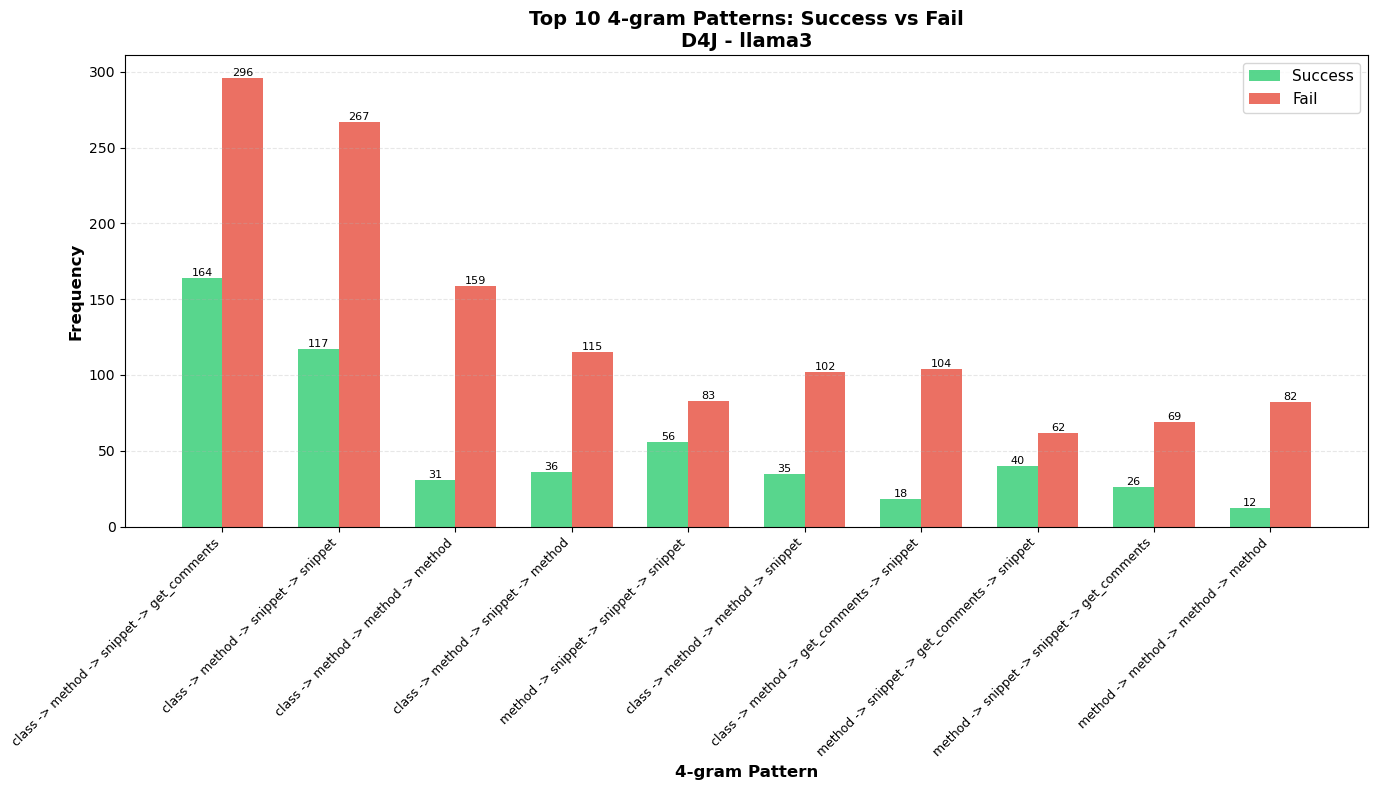


Benchmark: d4j | Model: llama3.1


Total 4-grams collected: 8399

Total 4-grams collected: 1663

Total 4-grams collected: 6736
                                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
        class -> method -> snippet -> snippet             509                 159              350         31.2%      68.8%
     snippet -> snippet -> snippet -> snippet             474                 118              356         24.9%      75.1%
          class -> method -> method -> method             373                   8              365          2.1%      97.9%
      method -> snippet -> snippet -> snippet             323                  86              237         26.6%      73.4%
   class -> method -> get_comments -> snippet             321                 127              194         39.6%      60.4%
   class -> method -> snippet -> get_comments             316                 129              187         40.8%      59.2%
    

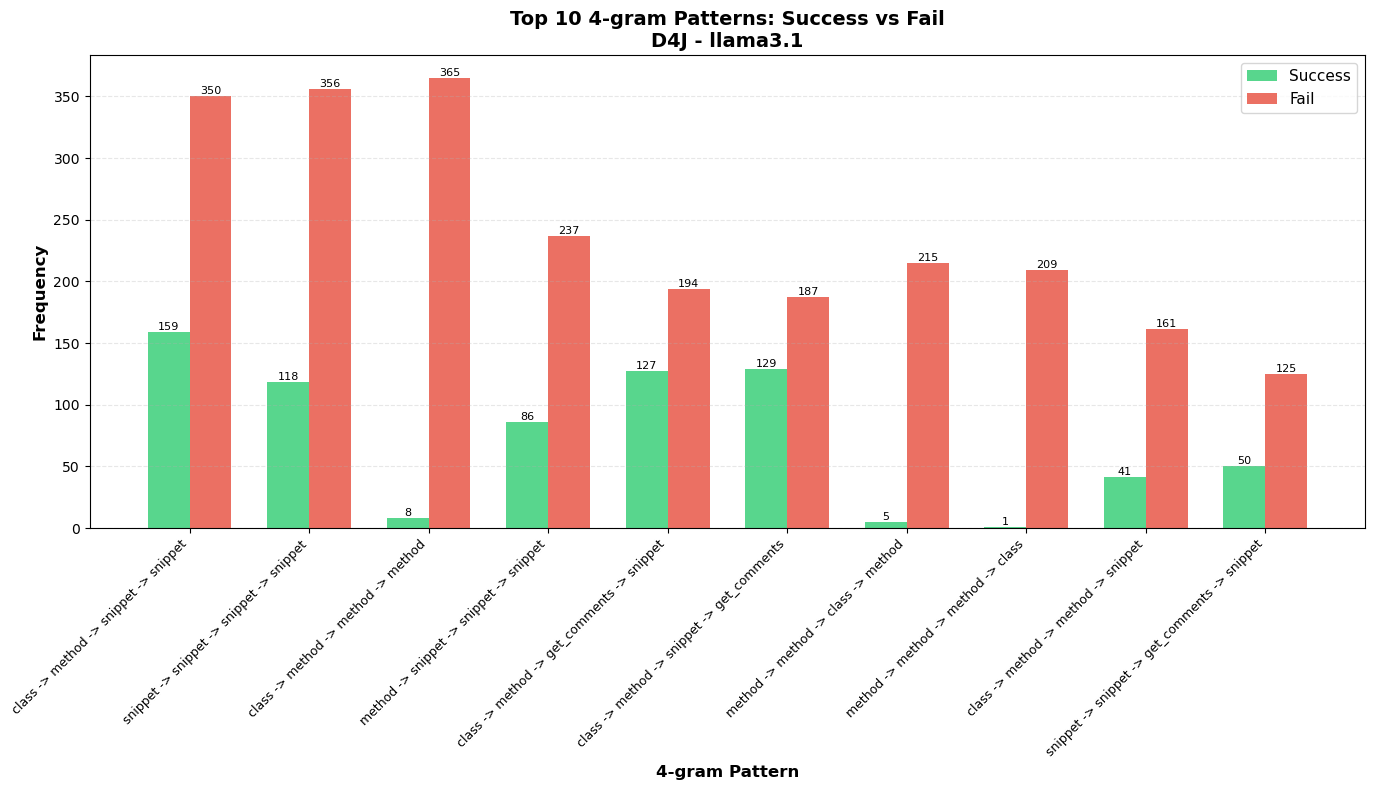


Benchmark: d4j | Model: mistral-nemo


Total 4-grams collected: 1523

Total 4-grams collected: 330

Total 4-grams collected: 1193
                                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
     snippet -> snippet -> snippet -> snippet             264                  60              204         22.7%      77.3%
        class -> method -> snippet -> snippet             214                  36              178         16.8%      83.2%
       class -> snippet -> snippet -> snippet             187                  42              145         22.5%      77.5%
   class -> method -> snippet -> get_comments             127                  41               86         32.3%      67.7%
      method -> snippet -> snippet -> snippet             101                  18               83         17.8%      82.2%
  class -> snippet -> snippet -> get_comments              60                  13               47         21.7%      78.3%
 

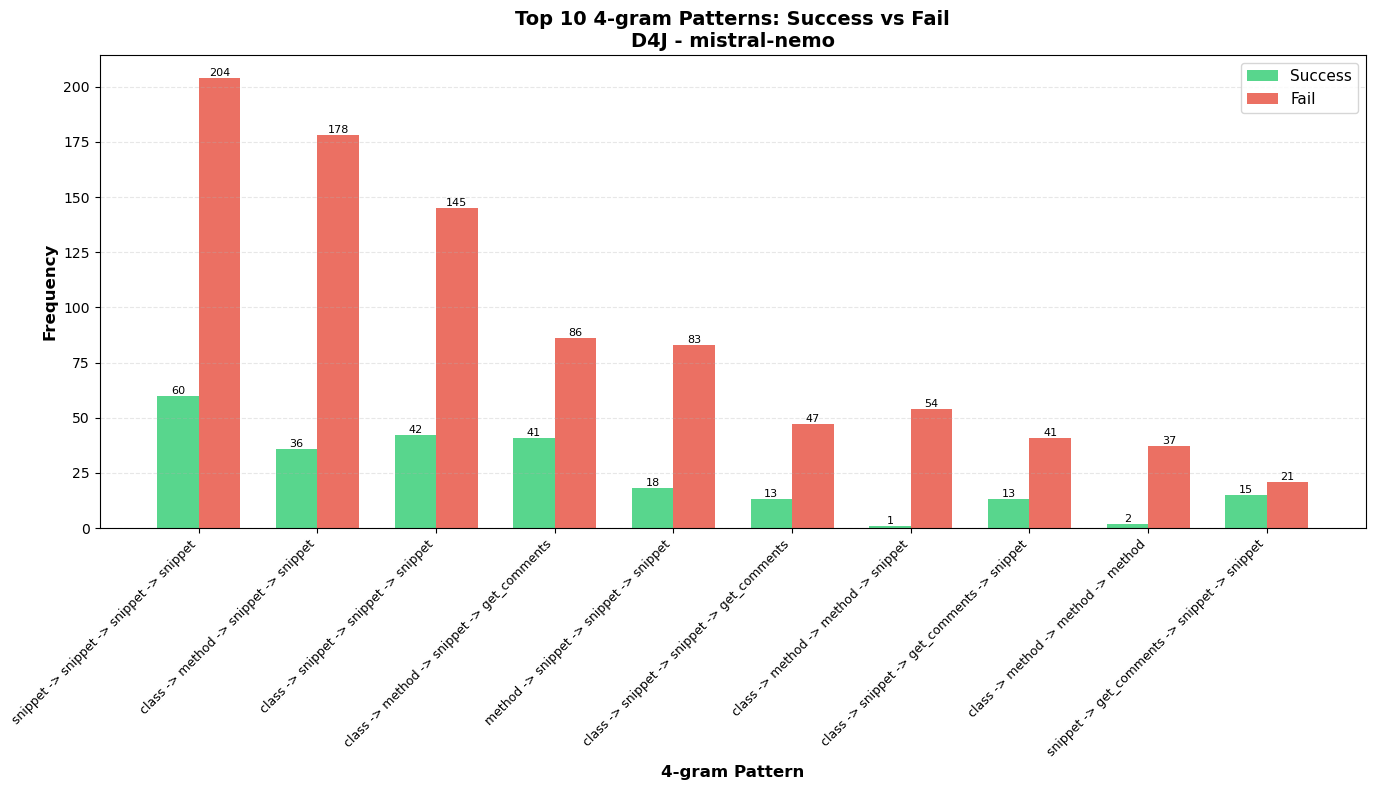


Benchmark: d4j | Model: qwen2.5-coder


Total 4-grams collected: 2082

Total 4-grams collected: 503

Total 4-grams collected: 1579
                                      pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
        class -> method -> snippet -> snippet             284                  59              225         20.8%      79.2%
       class -> snippet -> snippet -> snippet             203                  54              149         26.6%      73.4%
     snippet -> snippet -> snippet -> snippet             146                  41              105         28.1%      71.9%
      method -> snippet -> snippet -> snippet             131                  29              102         22.1%      77.9%
snippet -> snippet -> get_comments -> snippet             102                  32               70         31.4%      68.6%
  class -> snippet -> snippet -> get_comments              96                  24               72         25.0%      75.0%


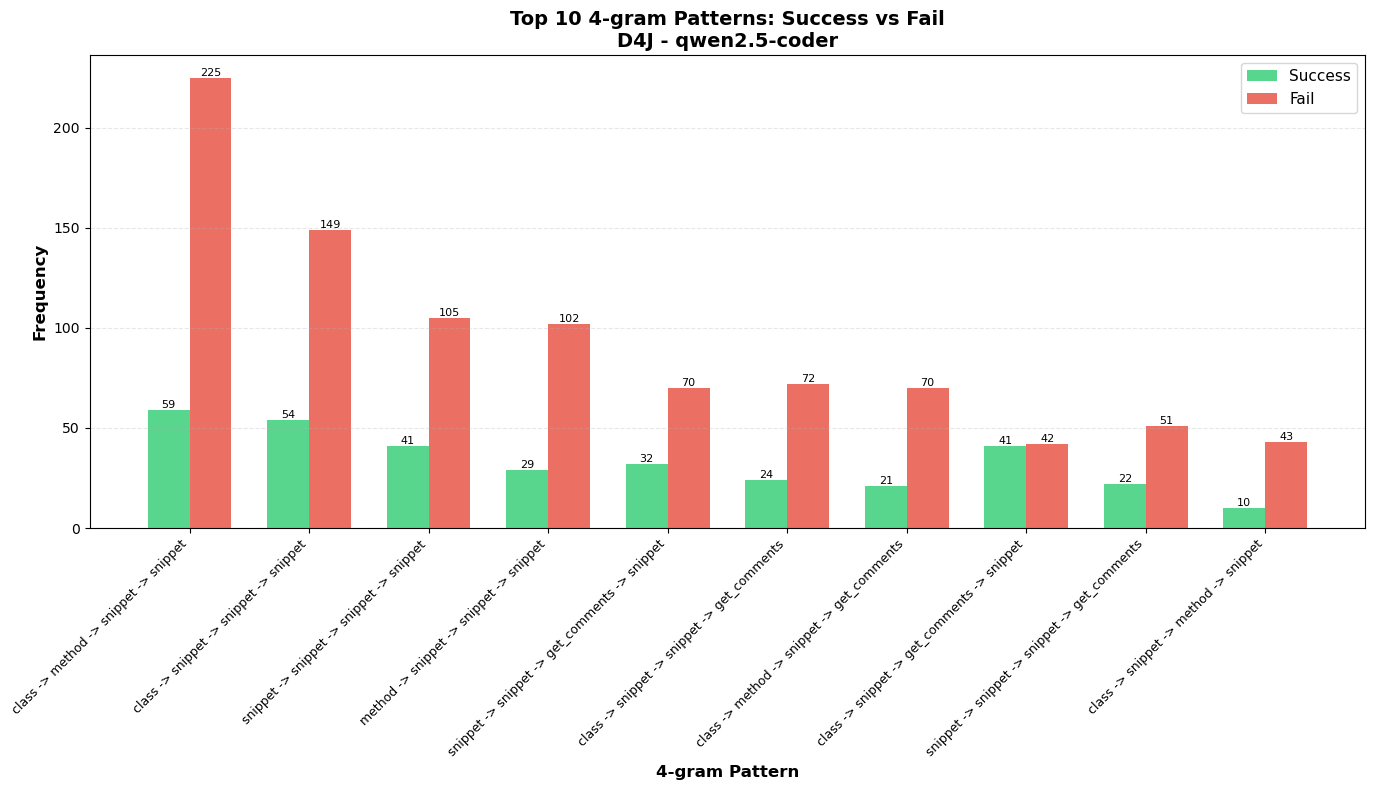


Benchmark: bip | Model: llama3


Total 4-grams collected: 11179

Total 4-grams collected: 1152

Total 4-grams collected: 10027
                            pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
   class -> class -> class -> class            5957                 564             5393          9.5%      90.5%
 package -> class -> class -> class            3360                 348             3012         10.4%      89.6%
  class -> class -> class -> method             509                  51              458         10.0%      90.0%
 class -> class -> class -> snippet             243                  50              193         20.6%      79.4%
 class -> class -> class -> package             156                   9              147          5.8%      94.2%
 class -> class -> package -> class             137                   4              133          2.9%      97.1%
 class -> package -> class -> class             114                   6   

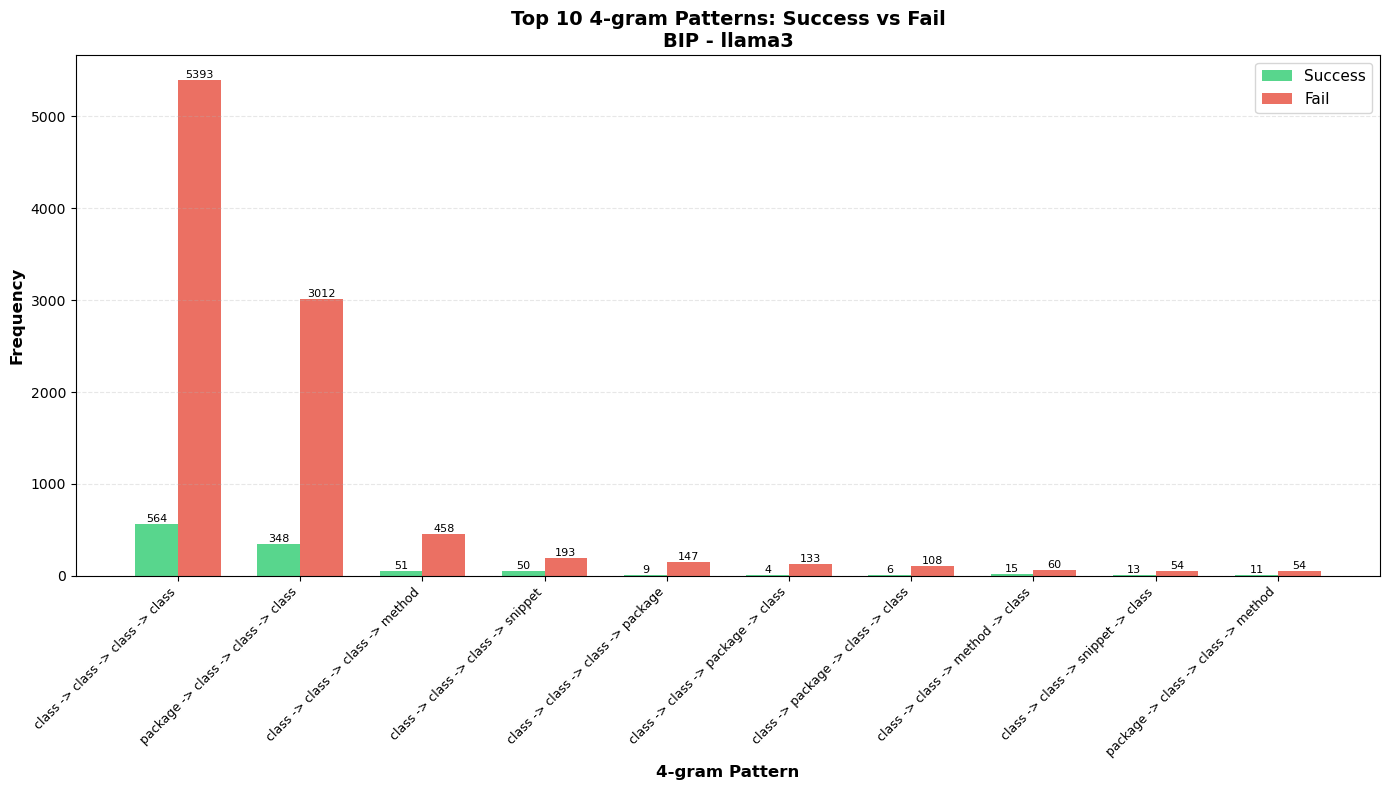


Benchmark: bip | Model: llama3.1


Total 4-grams collected: 15279

Total 4-grams collected: 2662

Total 4-grams collected: 12617
                                pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
       class -> class -> class -> class            6728                 841             5887         12.5%      87.5%
     package -> class -> class -> class            2145                 418             1727         19.5%      80.5%
      class -> class -> class -> method             888                 201              687         22.6%      77.4%
     class -> class -> class -> snippet             547                 149              398         27.2%      72.8%
    class -> class -> method -> snippet             455                 138              317         30.3%      69.7%
     class -> class -> snippet -> class             304                  69              235         22.7%      77.3%
      class -> class -> method -> class     

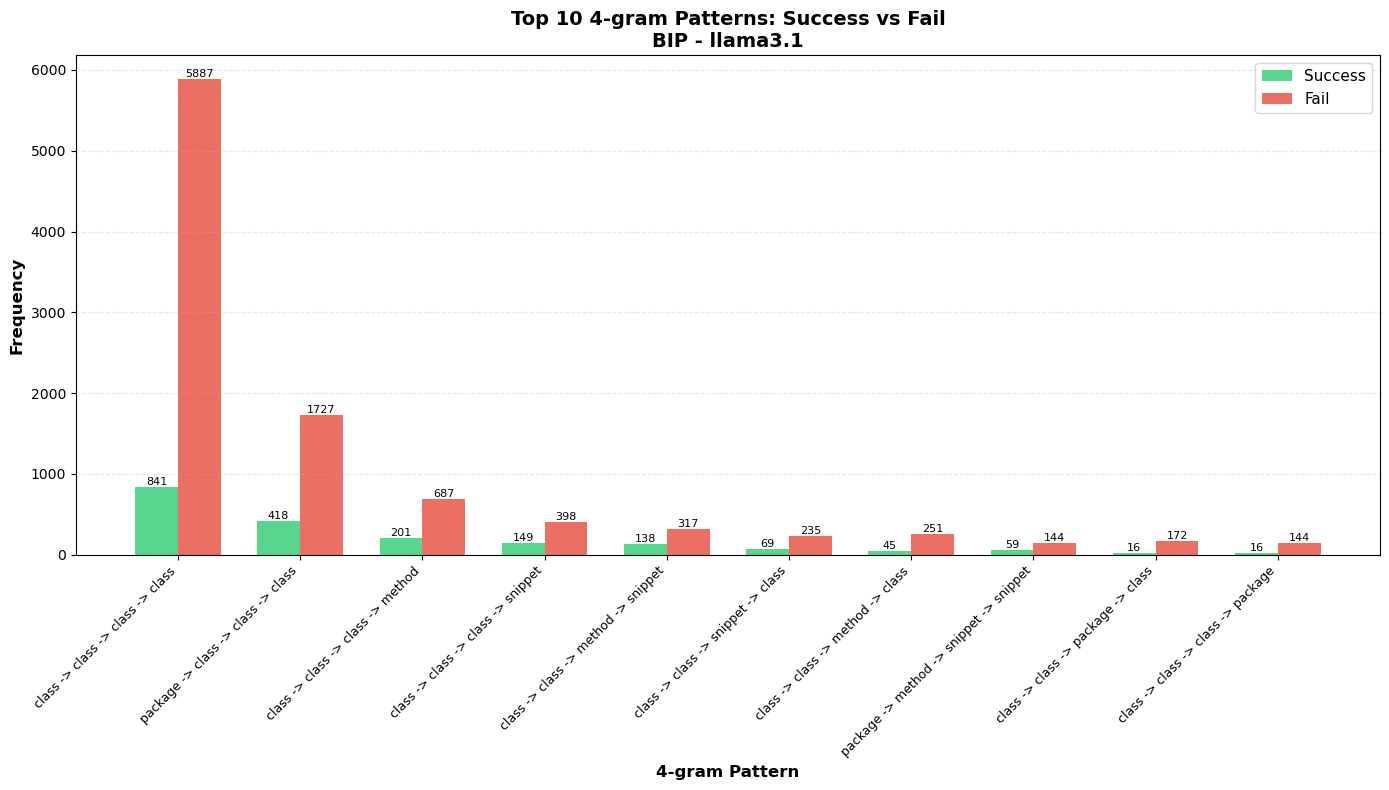


Benchmark: bip | Model: mistral-nemo


Total 4-grams collected: 2017

Total 4-grams collected: 441

Total 4-grams collected: 1576
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet             557                 125              432         22.4%      77.6%
  package -> method -> method -> snippet             311                  78              233         25.1%      74.9%
 method -> snippet -> snippet -> snippet             183                  16              167          8.7%      91.3%
  method -> method -> snippet -> snippet             135                  28              107         20.7%      79.3%
   package -> method -> method -> method             127                  44               83         34.6%      65.4%
  package -> method -> snippet -> method             101                  17               84         16.8%      83.2%
   method -> method -> method -> sni

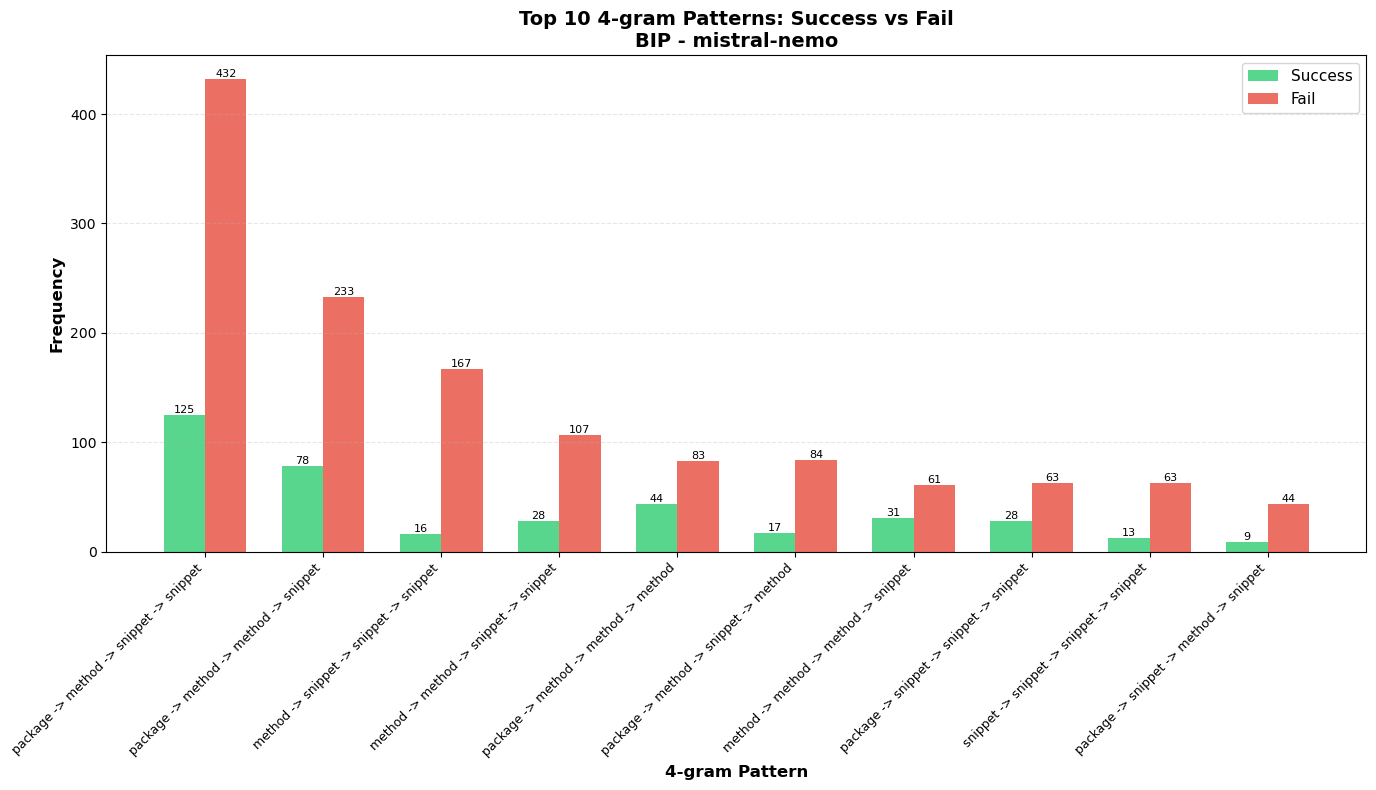


Benchmark: bip | Model: qwen2.5-coder


Total 4-grams collected: 1831

Total 4-grams collected: 370

Total 4-grams collected: 1461
                                 pattern  all_executions  success_executions  fail_executions success_ratio fail_ratio
 package -> method -> snippet -> snippet             394                  84              310         21.3%      78.7%
  package -> method -> snippet -> method             262                  52              210         19.8%      80.2%
  package -> method -> method -> snippet             152                  37              115         24.3%      75.7%
 method -> snippet -> snippet -> snippet             130                  24              106         18.5%      81.5%
  method -> snippet -> method -> snippet             114                  22               92         19.3%      80.7%
snippet -> snippet -> snippet -> snippet              95                  12               83         12.6%      87.4%
package -> snippet -> snippet -> sn

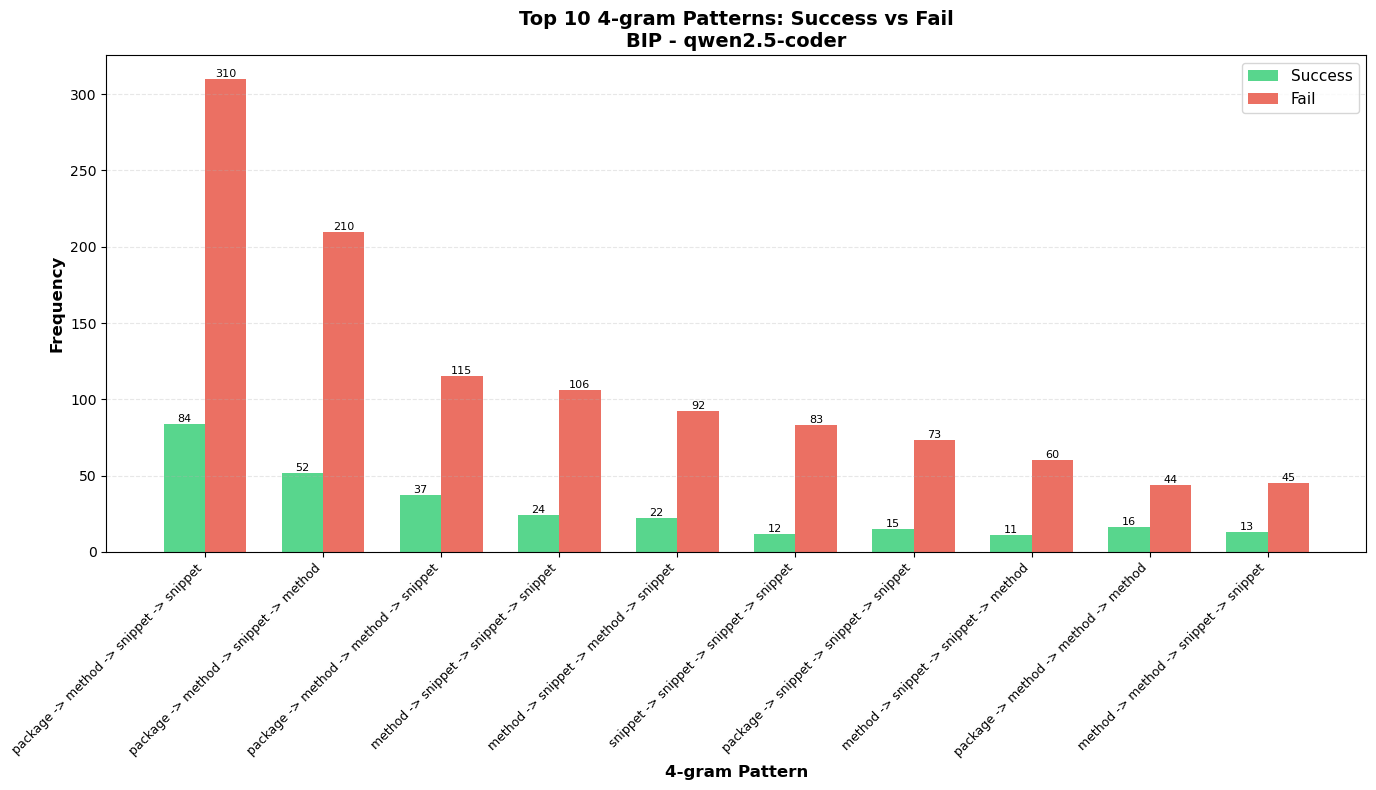

In [27]:
# Compare top 10 most frequent 4-grams in all executions vs success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comment': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_4grams = get_4grams_for_all_executions(bm, model)
        success_4grams = get_4grams_for_success_executions(bm, model)
        fail_4grams = get_4grams_for_fail_executions(bm, model)
        
        all_counter = Counter(all_4grams)
        success_counter = Counter(success_4grams)
        fail_counter = Counter(fail_4grams)
        
        # Get top 10 from all executions
        top_10_patterns = [pattern for pattern, count in all_counter.most_common(10)]
        
        # Create comparison table
        comparison_data = []
        for pattern in top_10_patterns:
            all_count = all_counter[pattern]
            success_count = success_counter[pattern]
            fail_count = fail_counter[pattern]
            
            comparison_data.append({
                'pattern': shorten_pattern(pattern),
                'all_executions': all_count,
                'success_executions': success_count,
                'fail_executions': fail_count,
                'success_ratio': f"{success_count/all_count*100:.1f}%" if all_count > 0 else "0%",
                'fail_ratio': f"{fail_count/all_count*100:.1f}%" if all_count > 0 else "0%"
            })
        
        # Display as DataFrame
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        print()
        
        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 8))
        
        patterns = comparison_df['pattern'].tolist()
        success_counts = comparison_df['success_executions'].tolist()
        fail_counts = comparison_df['fail_executions'].tolist()
        
        x = np.arange(len(patterns))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, success_counts, width, label='Success', color='#2ecc71', alpha=0.8)
        bars2 = ax.bar(x + width/2, fail_counts, width, label='Fail', color='#e74c3c', alpha=0.8)
        
        ax.set_xlabel('4-gram Pattern', fontsize=12, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax.set_title(f'Top 10 4-gram Patterns: Success vs Fail\n{bm.upper()} - {model}', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(patterns, rotation=45, ha='right', fontsize=9)
        ax.legend(fontsize=11)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()


Benchmark: d4j | Model: llama3


Total 4-grams collected: 3477

Total 4-grams collected: 950

Total 4-grams collected: 2527


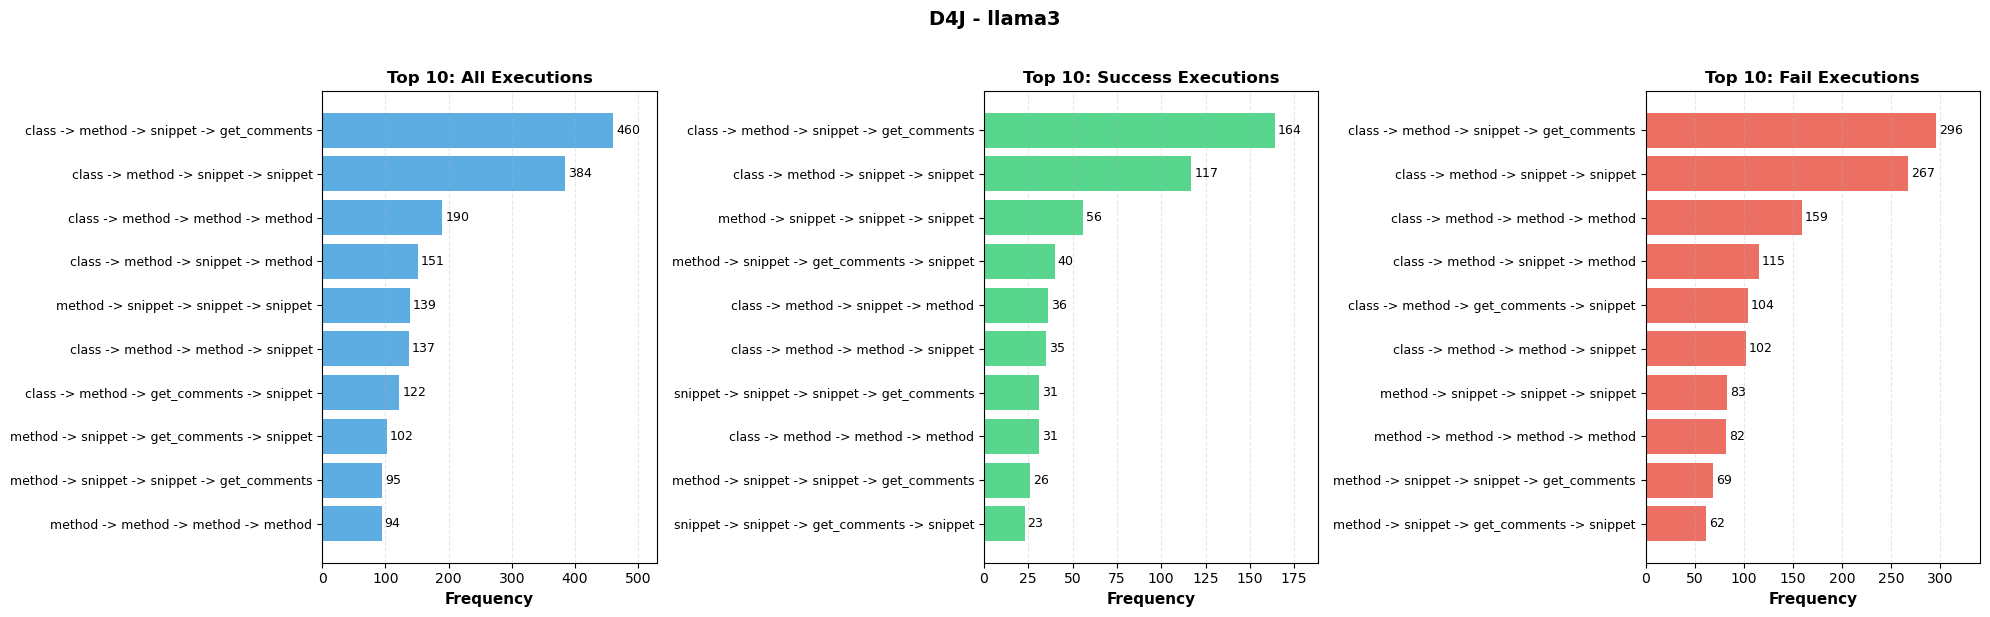


Benchmark: d4j | Model: llama3.1


Total 4-grams collected: 8399

Total 4-grams collected: 1663

Total 4-grams collected: 6736


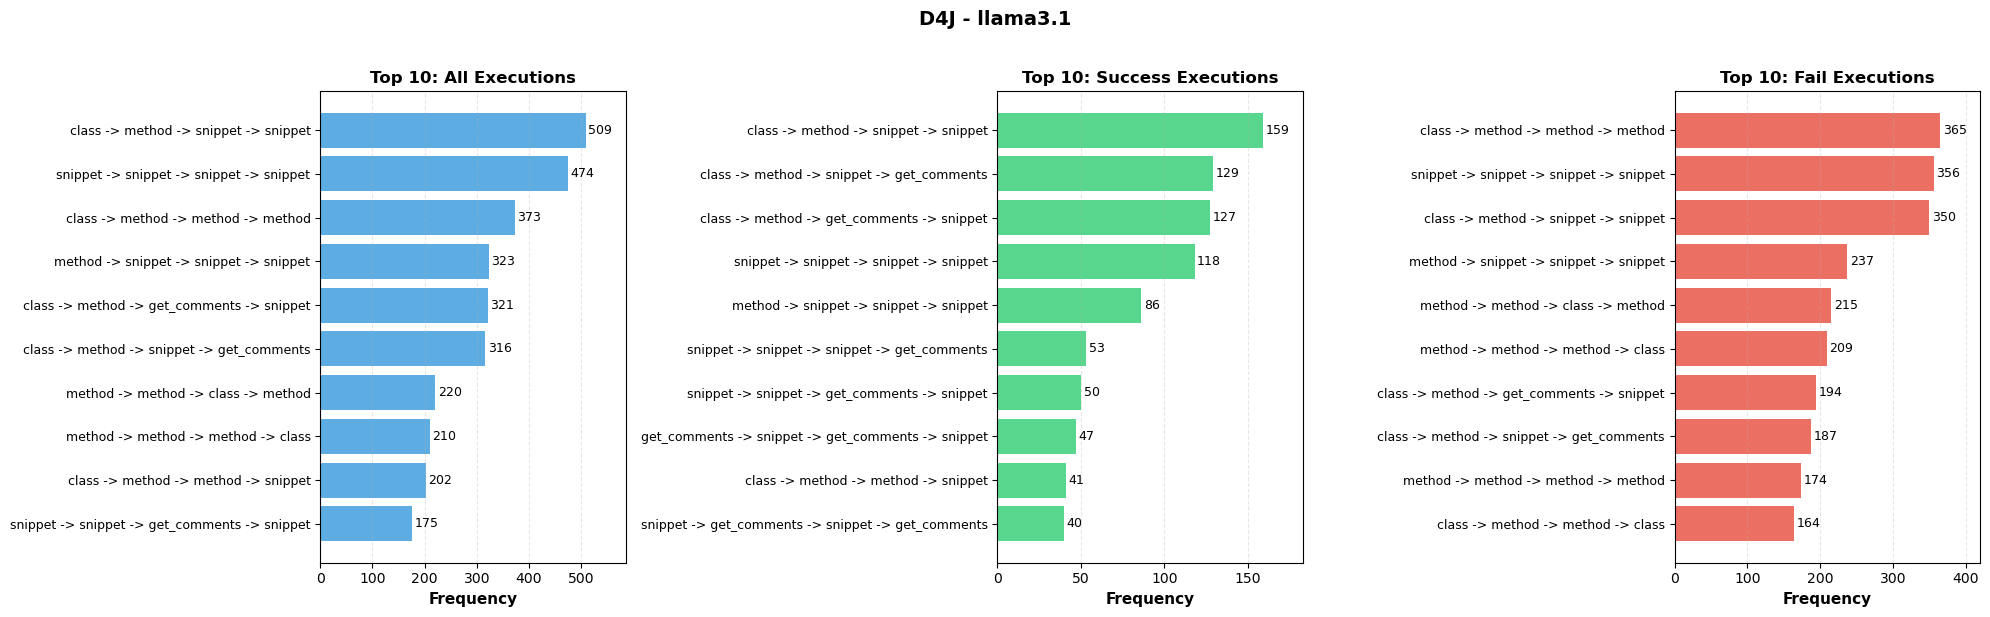


Benchmark: d4j | Model: mistral-nemo


Total 4-grams collected: 1523

Total 4-grams collected: 330

Total 4-grams collected: 1193


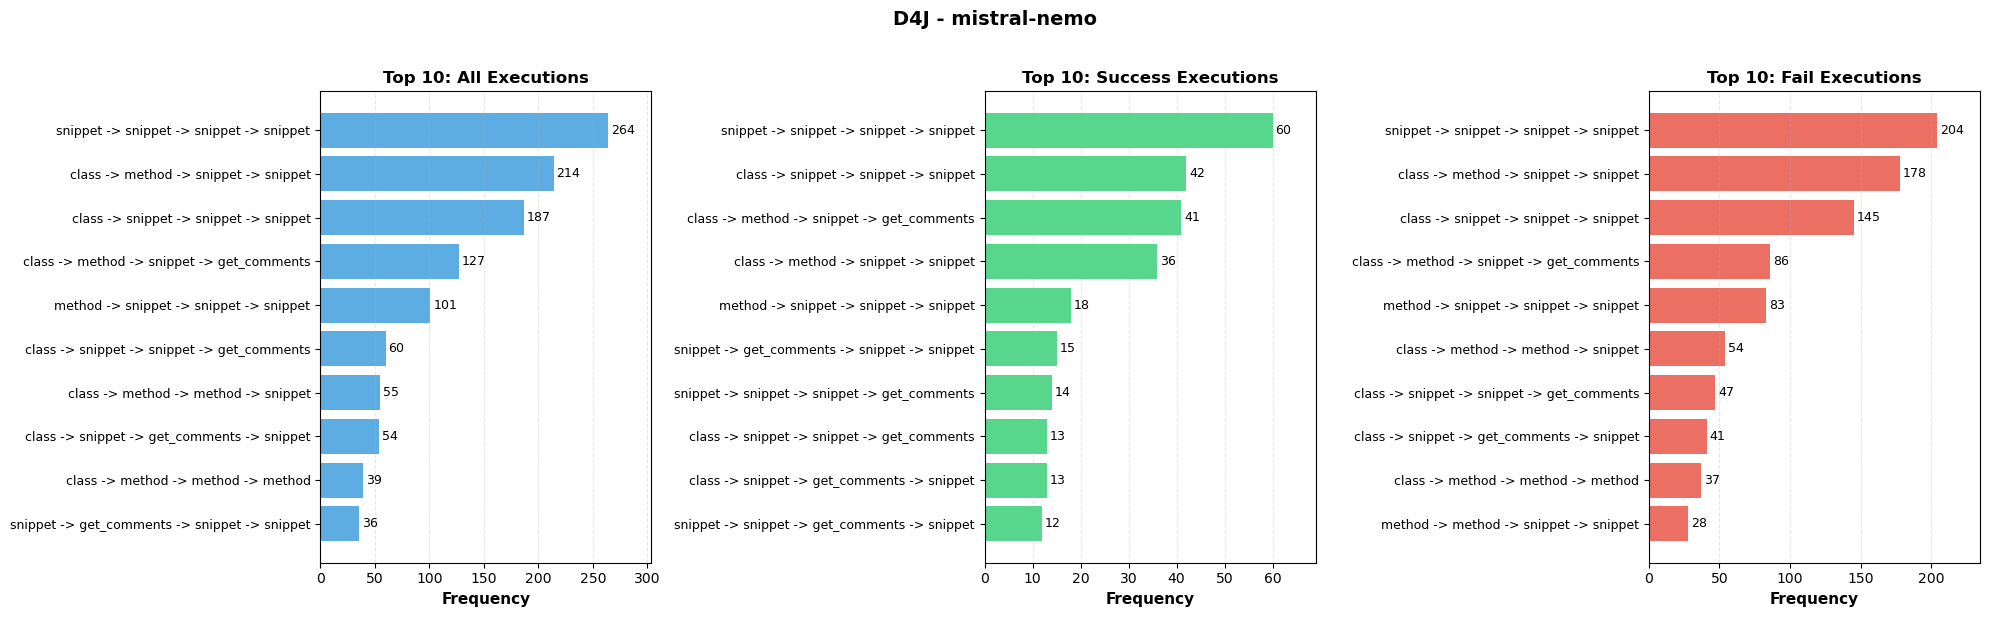


Benchmark: d4j | Model: qwen2.5-coder


Total 4-grams collected: 2082

Total 4-grams collected: 503

Total 4-grams collected: 1579


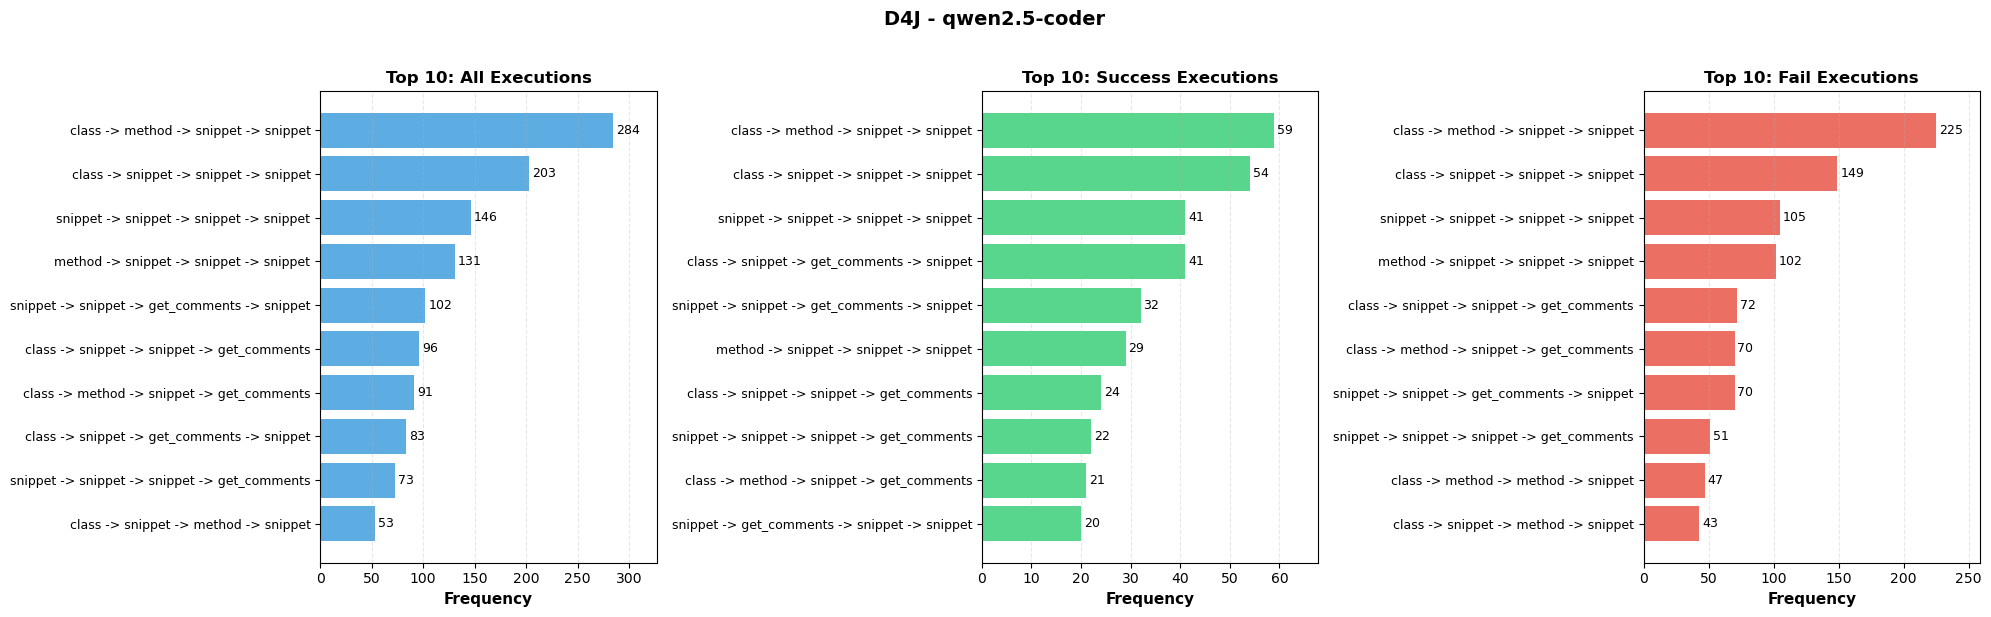


Benchmark: bip | Model: llama3


Total 4-grams collected: 11179

Total 4-grams collected: 1152

Total 4-grams collected: 10027


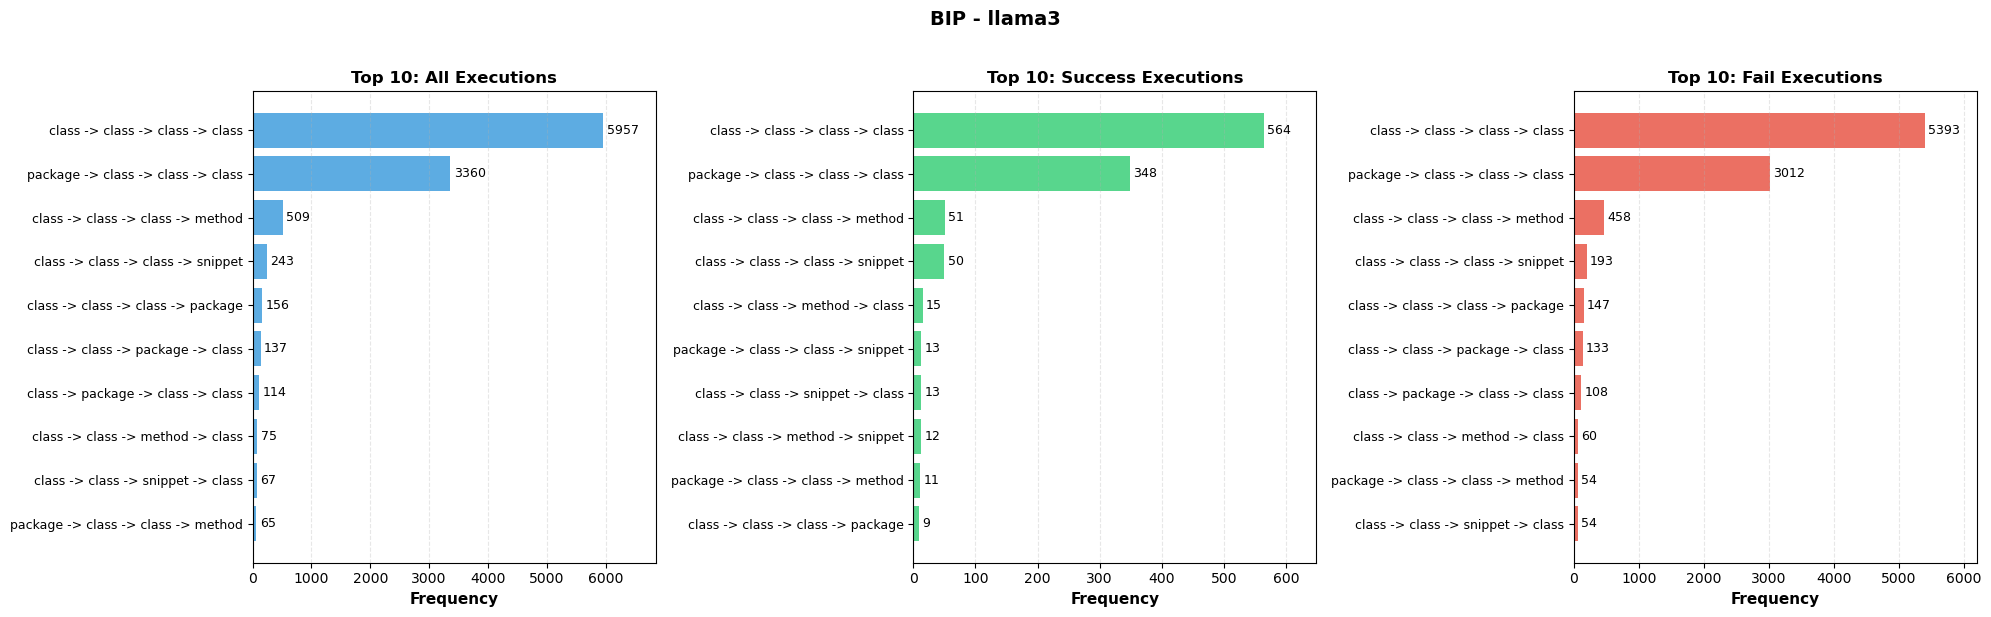


Benchmark: bip | Model: llama3.1


Total 4-grams collected: 15279

Total 4-grams collected: 2662

Total 4-grams collected: 12617


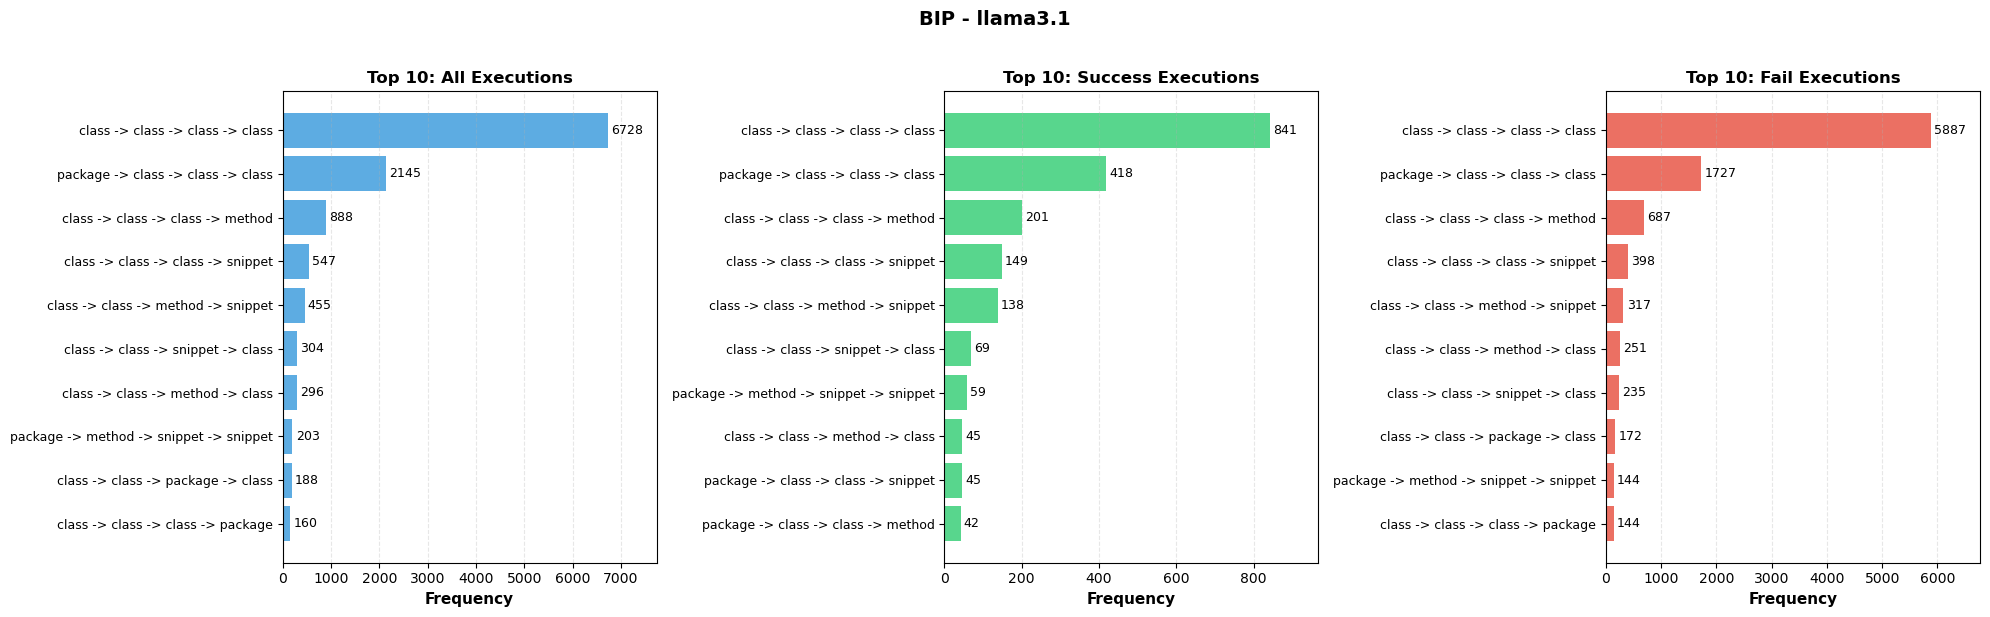


Benchmark: bip | Model: mistral-nemo


Total 4-grams collected: 2017

Total 4-grams collected: 441

Total 4-grams collected: 1576


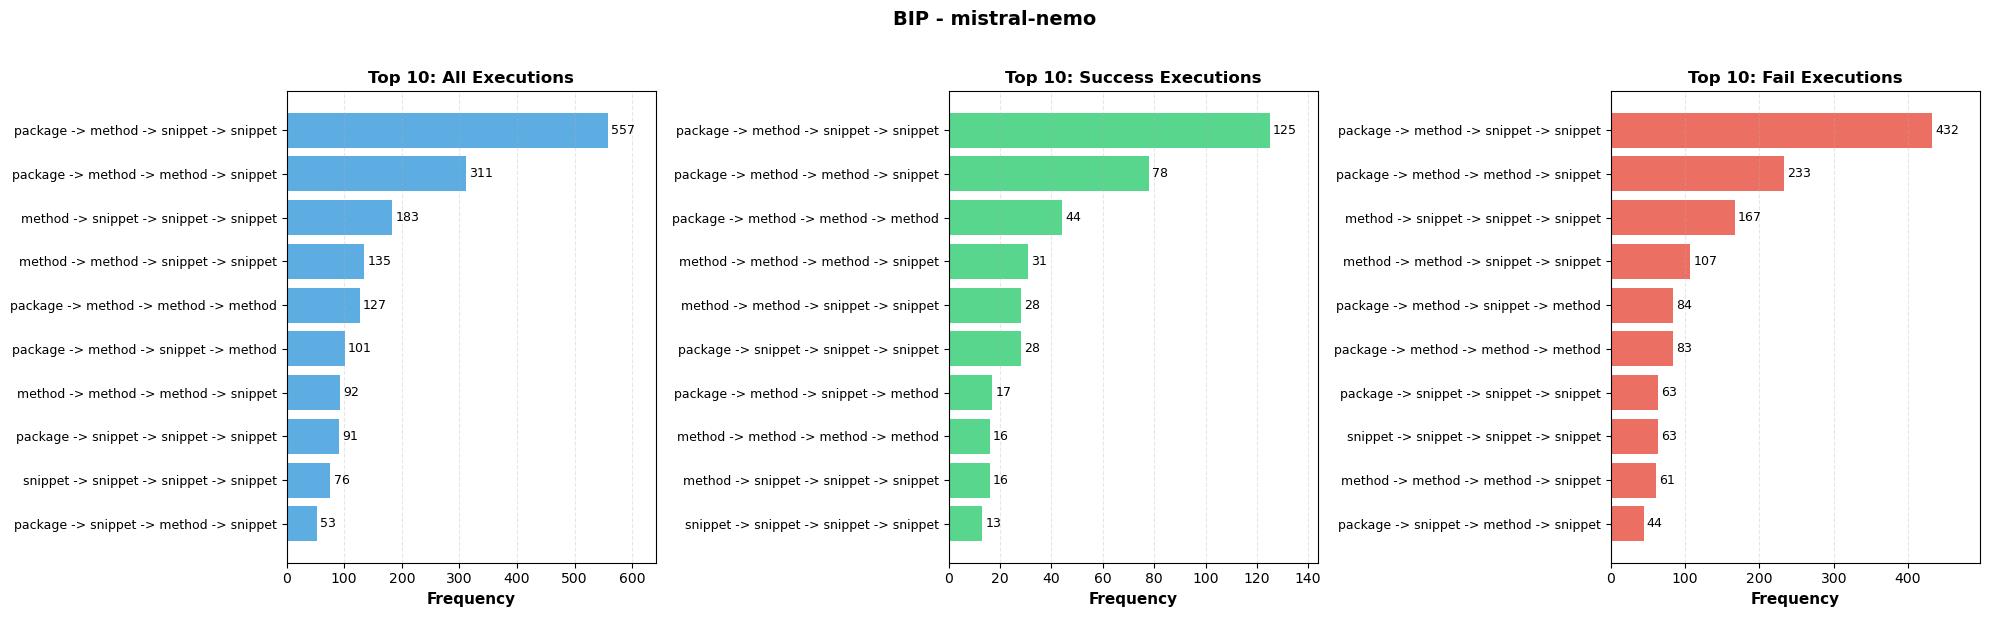


Benchmark: bip | Model: qwen2.5-coder


Total 4-grams collected: 1831

Total 4-grams collected: 370

Total 4-grams collected: 1461


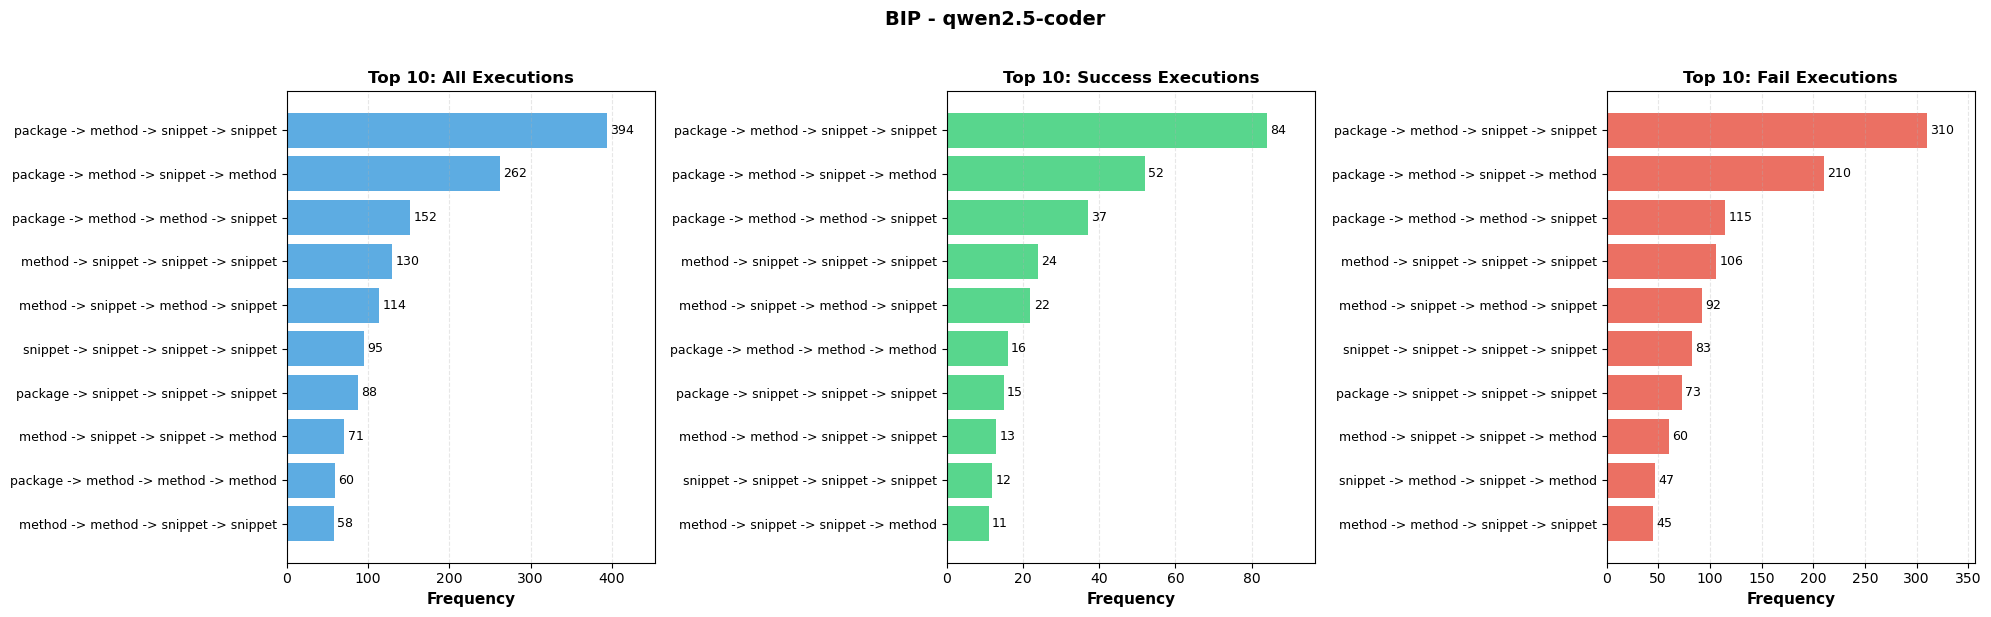

In [29]:
# Visualize Top 10 patterns separately for all/success/fail executions

import matplotlib.pyplot as plt
import numpy as np

# Function name mapping for readability
name_mapping = {
    'get_covered_packages': 'package',
    'get_failing_tests_covered_classes': 'class',
    'get_failing_tests_covered_methods_for_class': 'method',
    'get_code_snippet': 'snippet',
    'get_comment': 'comment'
}

def shorten_pattern(pattern_tuple):
    """Convert long function names to short versions"""
    return ' -> '.join([name_mapping.get(func, func) for func in pattern_tuple])

# For each benchmark and model combination
benchmarks = ['d4j', 'bip']
models = ['llama3', 'llama3.1', 'mistral-nemo', 'qwen2.5-coder']

for bm in benchmarks:
    for model in models:
        print(f"\n{'='*100}")
        print(f"Benchmark: {bm} | Model: {model}")
        print(f"{'='*100}\n")
        
        # Load the three counters
        all_4grams = get_4grams_for_all_executions(bm, model)
        success_4grams = get_4grams_for_success_executions(bm, model)
        fail_4grams = get_4grams_for_fail_executions(bm, model)
        
        all_counter = Counter(all_4grams)
        success_counter = Counter(success_4grams)
        fail_counter = Counter(fail_4grams)
        
        # Get top 10 from each counter
        top_10_all = [(shorten_pattern(pattern), count) for pattern, count in all_counter.most_common(10)]
        top_10_success = [(shorten_pattern(pattern), count) for pattern, count in success_counter.most_common(10)]
        top_10_fail = [(shorten_pattern(pattern), count) for pattern, count in fail_counter.most_common(10)]
        
        # Create 3 subplots
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        # Plot 1: All Executions
        patterns_all = [p[0] for p in top_10_all]
        counts_all = [p[1] for p in top_10_all]
        
        axes[0].barh(range(len(patterns_all)), counts_all, color='#3498db', alpha=0.8)
        axes[0].set_yticks(range(len(patterns_all)))
        axes[0].set_yticklabels(patterns_all, fontsize=9)
        axes[0].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 10: All Executions', fontsize=12, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(axis='x', alpha=0.3, linestyle='--')

        axes[0].set_xlim(0, max(counts_all)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_all):
            axes[0].text(v + max(counts_all)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 2: Success Executions
        patterns_success = [p[0] for p in top_10_success]
        counts_success = [p[1] for p in top_10_success]
        
        axes[1].barh(range(len(patterns_success)), counts_success, color='#2ecc71', alpha=0.8)
        axes[1].set_yticks(range(len(patterns_success)))
        axes[1].set_yticklabels(patterns_success, fontsize=9)
        axes[1].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 10: Success Executions', fontsize=12, fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].grid(axis='x', alpha=0.3, linestyle='--')

        axes[1].set_xlim(0, max(counts_success)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_success):
            axes[1].text(v + max(counts_success)*0.01, i, str(v), va='center', fontsize=9)
        
        # Plot 3: Fail Executions
        patterns_fail = [p[0] for p in top_10_fail]
        counts_fail = [p[1] for p in top_10_fail]
        
        axes[2].barh(range(len(patterns_fail)), counts_fail, color='#e74c3c', alpha=0.8)
        axes[2].set_yticks(range(len(patterns_fail)))
        axes[2].set_yticklabels(patterns_fail, fontsize=9)
        axes[2].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[2].set_title('Top 10: Fail Executions', fontsize=12, fontweight='bold')
        axes[2].invert_yaxis()
        axes[2].grid(axis='x', alpha=0.3, linestyle='--')

        axes[2].set_xlim(0, max(counts_fail)*1.15)
        
        # Add value labels
        for i, v in enumerate(counts_fail):
            axes[2].text(v + max(counts_fail)*0.01, i, str(v), va='center', fontsize=9)
        
        # Overall title
        fig.suptitle(f'{bm.upper()} - {model}', fontsize=14, fontweight='bold', y=1.02)
        
        plt.tight_layout()
        plt.show()